# Análisis de Métricas - ETSformer

Este notebook analiza los resultados de los experimentos realizados con ETSformer sobre los datasets ETTh1, ETTh2, ETTm1, ETTm2.

## Configuración Experimental
- **Datasets**: ETTh1, ETTh2, ETTm1, ETTm2
- **Ventana de entrada**: 96 timesteps
- **Horizontes de predicción**: {24, 48, 96, 192, 336, 720}
- **Variable objetivo**: OT
- **Split**: 70% train, 10% validación, 20% test

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from results_loader import ResultsLoader, format_metric_table

# Configuración de visualización
sns.set_style('whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

%matplotlib inline

## 1. Cargar Resultados

In [100]:
# Inicializar cargador de resultados
loader = ResultsLoader(results_dir='../results')

# Cargar todos los resultados
results_df = loader.get_all_results()

print(f"Total de experimentos cargados: {len(results_df)}")
print(f"\nDatasets: {sorted(results_df['dataset'].unique())}")
print(f"Horizontes: {sorted(results_df['horizon'].unique())}")

results_df

Total de experimentos cargados: 24

Datasets: ['ETTh1', 'ETTh2', 'ETTm1', 'ETTm2']
Horizontes: [24, 48, 96, 192, 336, 720]


,dataset,horizon,model,date,time,folder,mse_test,mae_test,rmse_test,mape_test,mspe_test,mse_val,mae_val,rmse_val,mape_val,mspe_val
0,ETTh1,24,ETSformer,20251003,004447,20251003_004447_ETSformer_ETTh1_24,0.459354,0.461667,0.677757,10.698885,47951.160156,0.550398,0.515219,0.741888,7.200341,33931.937500
1,ETTh1,48,ETSformer,20251003,004835,20251003_004835_ETSformer_ETTh1_48,0.485460,0.473536,0.696749,11.159221,54506.945312,0.656710,0.561294,0.810377,7.273551,33149.003906
2,ETTh1,96,ETSformer,20251003,005137,20251003_005137_ETSformer_ETTh1_96,0.508077,0.484266,0.712795,11.159213,52399.628906,0.813018,0.621587,0.901675,7.449787,33889.156250
3,ETTh1,192,ETSformer,20251003,005550,20251003_005550_ETSformer_ETTh1_192,0.554125,0.509196,0.744396,11.478393,51015.214844,1.118327,0.724203,1.057510,8.111408,38181.531250
4,ETTh1,336,ETSformer,20251003,010002,20251003_010002_ETSformer_ETTh1_336,0.591975,0.526196,0.769399,11.631910,54947.402344,1.426100,0.823880,1.194194,9.062313,48756.835938
5,ETTh1,720,ETSformer,20251003,010359,20251003_010359_ETSformer_ETTh1_720,0.582199,0.538672,0.763019,12.069614,57974.015625,1.730917,0.919105,1.315643,10.692178,76854.195312
6,ETTh2,24,ETSformer,20251003,010857,20251003_010857_ETSformer_ETTh2_24,0.210580,0.318517,0.458890,1.690325,583.512329,0.159682,0.292414,0.399602,1.916523,370.436676
7,ETTh2,48,ETSformer,20251003,011235,20251003_011235_ETSformer_ETTh2_48,0.268691,0.352531,0.518355,1.810778,746.339722,0.199880,0.324746,0.447079,2.056163,389.440735
8,ETTh2,96,ETSformer,20251003,011526,20251003_011526_ETSformer_ETTh2_96,0.345007,0.399335,0.587373,1.918414,761.222961,0.260681,0.366585,0.510570,2.289946,440.067596
9,ETTh2,192,ETSformer,20251003,011854,20251003_011854_ETSformer_ETTh2_192,0.433785,0.444483,0.658623,2.000121,705.778748,0.317677,0.398159,0.563628,2.443539,487.207916


## 2. Métricas por Horizonte

### 2.1 MSE (Mean Squared Error) - Test Set

*Observar: ETTm2 consistentemente muestra menor error. El error aumenta con el horizonte de predicción.*

In [101]:
# Crear tabla de MSE
tables = loader.create_metrics_table(results_df, metrics=['mse_test', 'mae_test'])

mse_table = format_metric_table(tables['mse_test'], 'MSE', decimal_places=4)
print("\n" + "="*60)
print("MSE por Dataset y Horizonte (Test Set)")
print("="*60)
display(mse_table)


MSE por Dataset y Horizonte (Test Set)


MSE por Horizonte,24,48,96,192,336,720
dataset,,,,,,
ETTh1,0.4594,0.4855,0.5081,0.5541,0.5920,0.5822
ETTh2,0.2106,0.2687,0.3450,0.4338,0.4728,0.4749
ETTm1,0.2602,0.3396,0.3731,0.4043,0.4313,0.4943
ETTm2,0.1132,0.1453,0.1870,0.2514,0.3132,0.4134


### 2.2 MAE (Mean Absolute Error) - Test Set

In [102]:
mae_table = format_metric_table(tables['mae_test'], 'MAE', decimal_places=4)
print("\n" + "="*60)
print("MAE por Dataset y Horizonte (Test Set)")
print("="*60)
display(mae_table)


MAE por Dataset y Horizonte (Test Set)


MAE por Horizonte,24,48,96,192,336,720
dataset,,,,,,
ETTh1,0.4617,0.4735,0.4843,0.5092,0.5262,0.5387
ETTh2,0.3185,0.3525,0.3993,0.4445,0.4755,0.4863
ETTm1,0.3330,0.3812,0.3963,0.4072,0.4241,0.4563
ETTm2,0.2249,0.2532,0.2785,0.3176,0.3553,0.4122


### 2.3 Resumen Estadístico

In [103]:
# Estadísticas por dataset
print("\n" + "="*60)
print("Estadísticas de MSE por Dataset")
print("="*60)
mse_stats = results_df.groupby('dataset')['mse_test'].agg(['mean', 'std', 'min', 'max'])
display(mse_stats.round(4))

print("\n" + "="*60)
print("Estadísticas de MAE por Dataset")
print("="*60)
mae_stats = results_df.groupby('dataset')['mae_test'].agg(['mean', 'std', 'min', 'max'])
display(mae_stats.round(4))


Estadísticas de MSE por Dataset


,mean,std,min,max
dataset,,,,
ETTh1,0.5302,0.0540,0.4594,0.5920
ETTh2,0.3676,0.1113,0.2106,0.4749
ETTm1,0.3838,0.0803,0.2602,0.4943
ETTm2,0.2373,0.1126,0.1132,0.4134



Estadísticas de MAE por Dataset


,mean,std,min,max
dataset,,,,
ETTh1,0.4989,0.0306,0.4617,0.5387
ETTh2,0.4128,0.0679,0.3185,0.4863
ETTm1,0.3997,0.0416,0.3330,0.4563
ETTm2,0.3070,0.0692,0.2249,0.4122


## 3. Visualización de Métricas

### 3.1 MSE por Horizonte y Dataset

*Los gráficos revelan la relación positiva entre horizonte y error. ETTh1 es el más desafiante.*

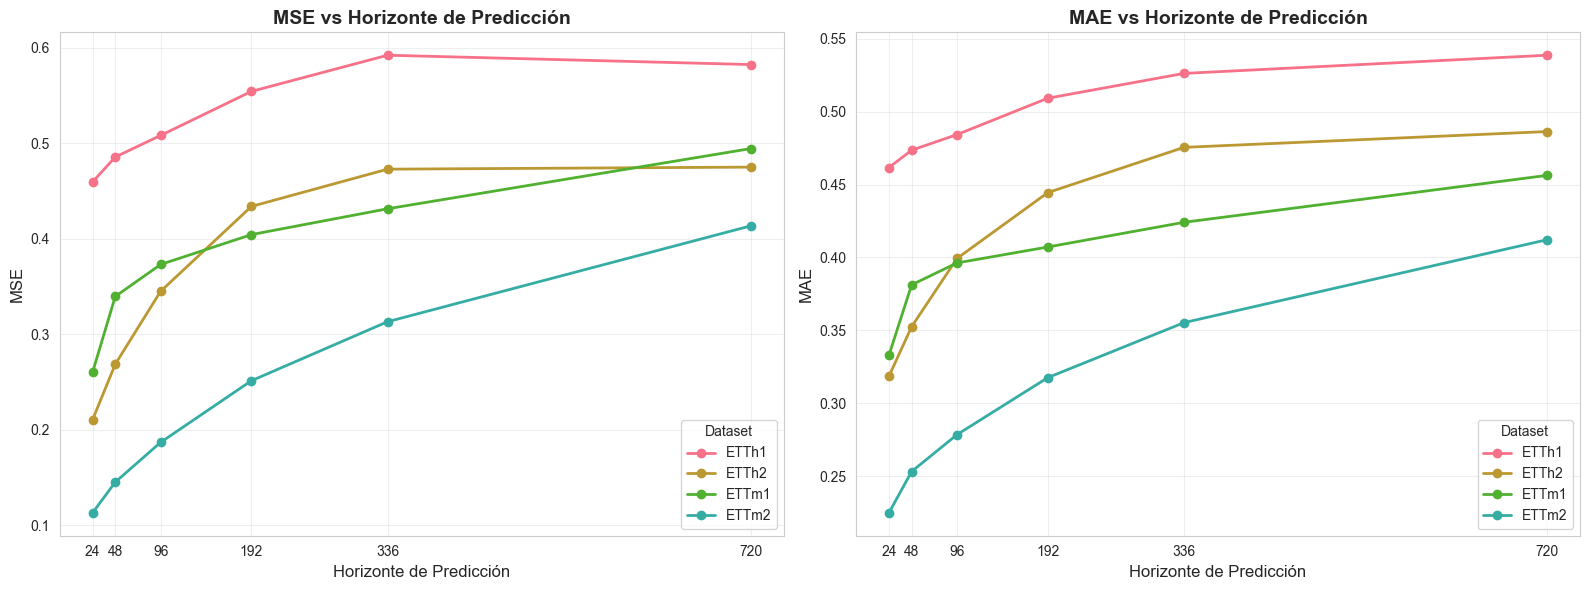

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# MSE
for dataset in sorted(results_df['dataset'].unique()):
    data = results_df[results_df['dataset'] == dataset].sort_values('horizon')
    axes[0].plot(data['horizon'], data['mse_test'], marker='o', label=dataset, linewidth=2)

axes[0].set_xlabel('Horizonte de Predicción', fontsize=12)
axes[0].set_ylabel('MSE', fontsize=12)
axes[0].set_title('MSE vs Horizonte de Predicción', fontsize=14, fontweight='bold')
axes[0].legend(title='Dataset')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(sorted(results_df['horizon'].unique()))

# MAE
for dataset in sorted(results_df['dataset'].unique()):
    data = results_df[results_df['dataset'] == dataset].sort_values('horizon')
    axes[1].plot(data['horizon'], data['mae_test'], marker='o', label=dataset, linewidth=2)

axes[1].set_xlabel('Horizonte de Predicción', fontsize=12)
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].set_title('MAE vs Horizonte de Predicción', fontsize=14, fontweight='bold')
axes[1].legend(title='Dataset')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(sorted(results_df['horizon'].unique()))

plt.tight_layout()
plt.show()

### 3.2 Heatmap de Métricas

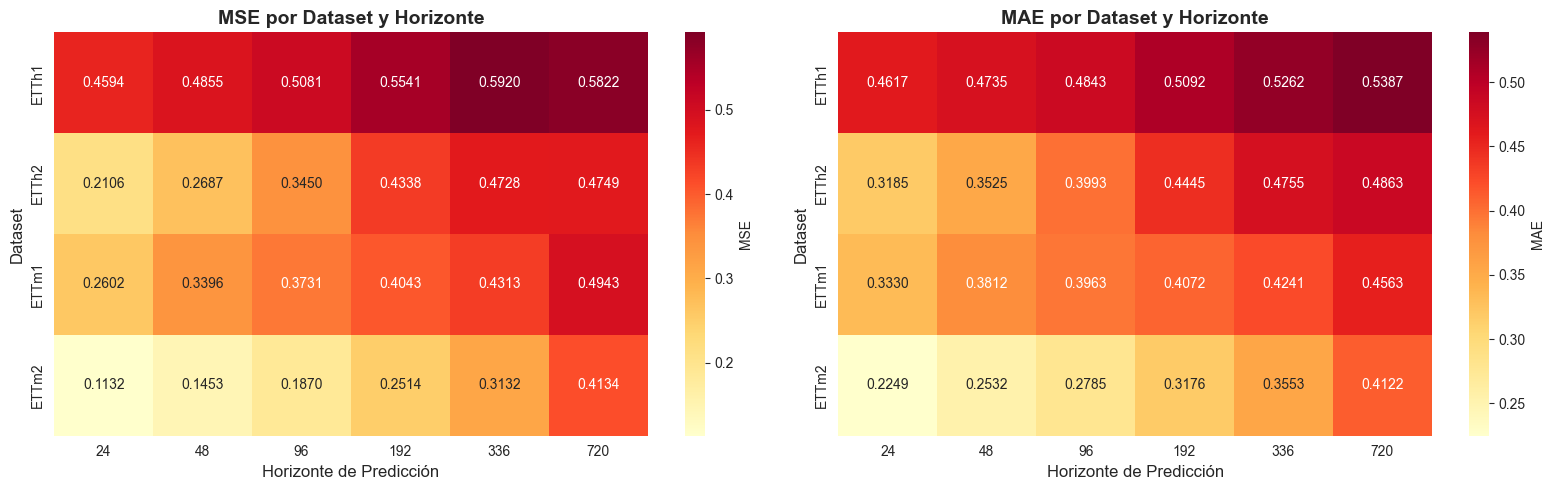

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Heatmap MSE
sns.heatmap(tables['mse_test'], annot=True, fmt='.4f', cmap='YlOrRd', 
            cbar_kws={'label': 'MSE'}, ax=axes[0])
axes[0].set_title('MSE por Dataset y Horizonte', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Horizonte de Predicción', fontsize=12)
axes[0].set_ylabel('Dataset', fontsize=12)

# Heatmap MAE
sns.heatmap(tables['mae_test'], annot=True, fmt='.4f', cmap='YlOrRd', 
            cbar_kws={'label': 'MAE'}, ax=axes[1])
axes[1].set_title('MAE por Dataset y Horizonte', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Horizonte de Predicción', fontsize=12)
axes[1].set_ylabel('Dataset', fontsize=12)

plt.tight_layout()
plt.show()

### 3.3 Boxplots por Dataset

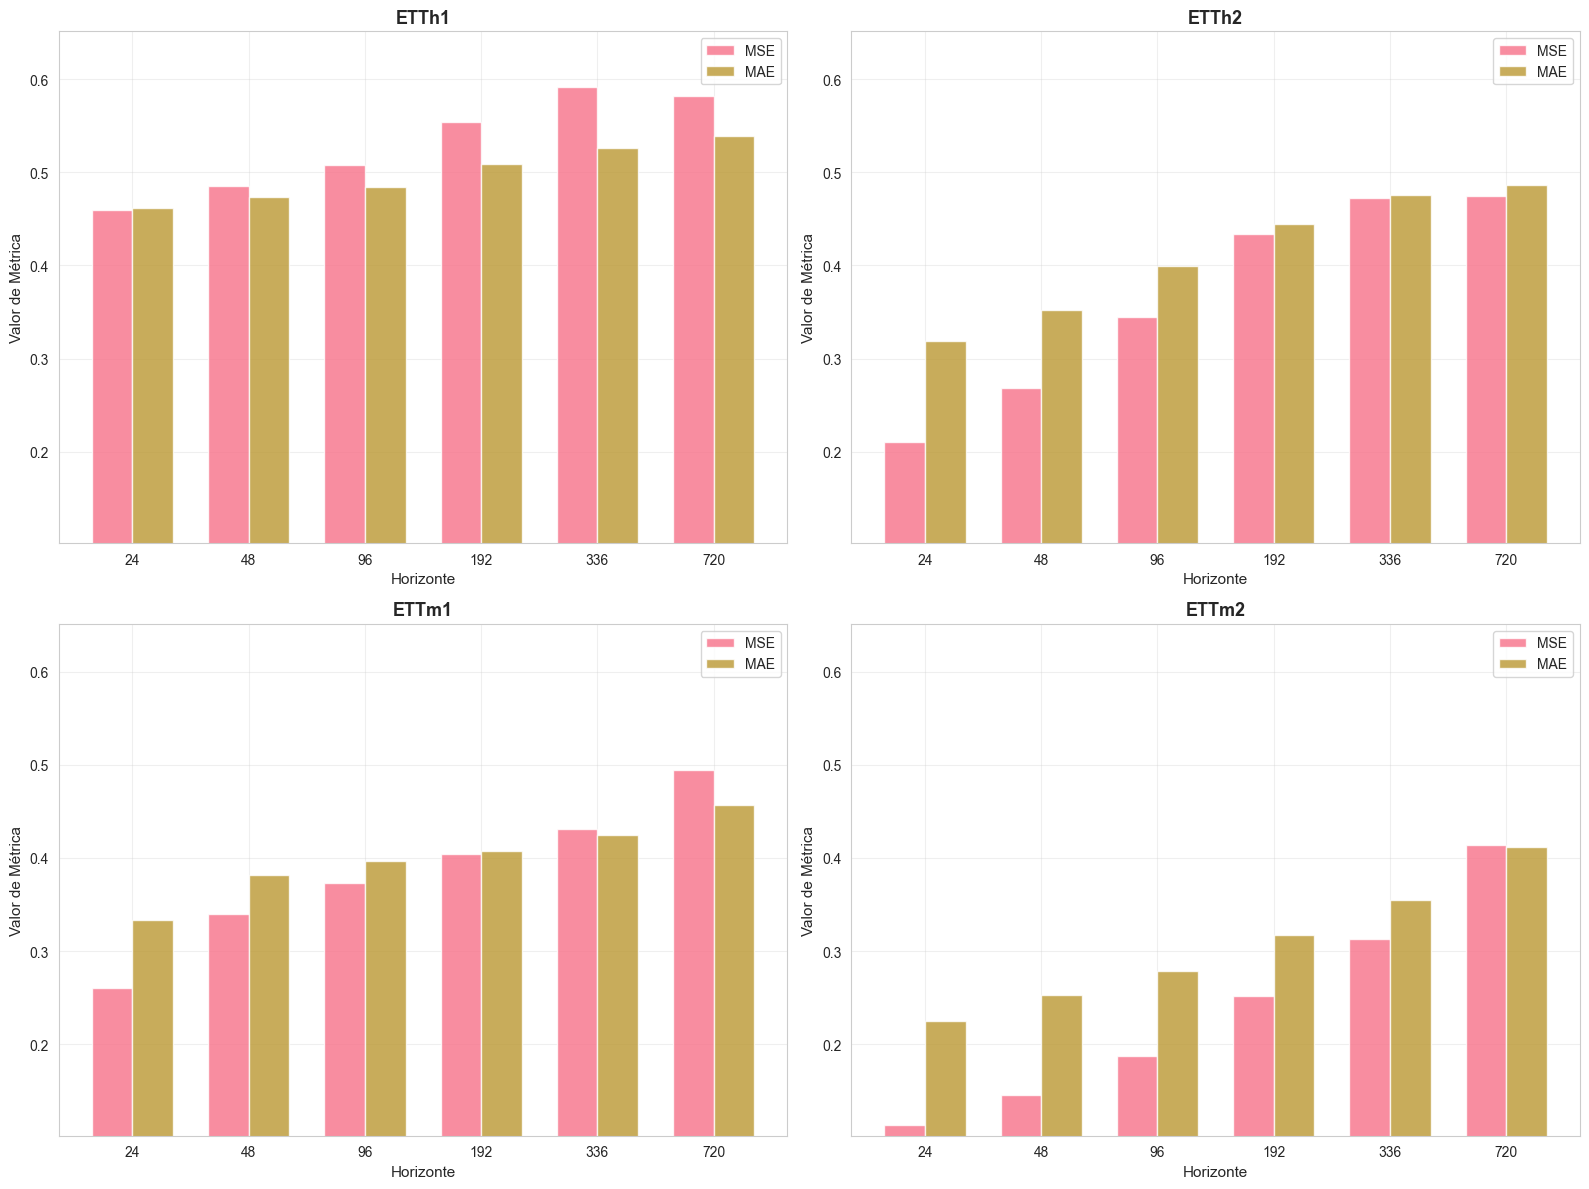

In [106]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

datasets = sorted(results_df['dataset'].unique())

# Calcular límites globales del eje Y
y_max = max(results_df['mse_test'].max(), results_df['mae_test'].max())
y_min = min(results_df['mse_test'].min(), results_df['mae_test'].min())
y_limit = (y_min * 0.9, y_max * 1.1)  # Agregar 10% de margen

for idx, dataset in enumerate(datasets):
    row = idx // 2
    col = idx % 2
    
    data = results_df[results_df['dataset'] == dataset]
    
    # Preparar datos para boxplot
    metrics_data = []
    labels = []
    
    for horizon in sorted(data['horizon'].unique()):
        horizon_data = data[data['horizon'] == horizon]
        if len(horizon_data) > 0:
            metrics_data.append([horizon_data['mse_test'].values[0], 
                                horizon_data['mae_test'].values[0]])
            labels.append(str(horizon))
    
    metrics_array = np.array(metrics_data)
    
    x = np.arange(len(labels))
    width = 0.35
    
    axes[row, col].bar(x - width/2, metrics_array[:, 0], width, label='MSE', alpha=0.8)
    axes[row, col].bar(x + width/2, metrics_array[:, 1], width, label='MAE', alpha=0.8)
    
    axes[row, col].set_xlabel('Horizonte', fontsize=11)
    axes[row, col].set_ylabel('Valor de Métrica', fontsize=11)
    axes[row, col].set_title(f'{dataset}', fontsize=13, fontweight='bold')
    axes[row, col].set_xticks(x)
    axes[row, col].set_xticklabels(labels)
    axes[row, col].set_ylim(y_limit)  # Aplicar límites compartidos
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.4 Predicciones vs Valores Reales

*Visualización de ventanas de tiempo mostrando la tendencia de los datos con ventana de entrada (96 pasos) y horizonte de predicción. Las predicciones (rojo) capturan bien la tendencia general de los valores reales (azul).*

In [107]:
from results_loader import load_dataset

# Cargar datasets
datasets_data = {}
for dataset_name in ['ETTh1', 'ETTh2', 'ETTm1', 'ETTm2']:
    df = load_dataset(dataset_name)
    if df is not None:
        datasets_data[dataset_name] = df

# Configuración
seq_len = 96  # Ventana de entrada

# Calcular índices de test set (20% final del dataset)
def get_test_indices(dataset_df, seq_len=96, pred_len=96):
    total_len = len(dataset_df)
    train_end = int(total_len * 0.7)
    val_end = int(total_len * 0.8)
    test_start = val_end
    
    # Asegurar que hay suficiente espacio para ventana + predicción
    max_start = total_len - seq_len - pred_len
    if test_start > max_start:
        test_start = max_start
    
    return test_start, total_len - pred_len

print("Datasets cargados:")
for name, df in datasets_data.items():
    test_start, test_end = get_test_indices(df)
    print(f"  {name}: {len(df)} registros, Test set: [{test_start}:{test_end}]")

Datasets cargados:
  ETTh1: 17420 registros, Test set: [13936:17324]
  ETTh2: 17420 registros, Test set: [13936:17324]
  ETTm1: 69680 registros, Test set: [55744:69584]
  ETTm2: 69680 registros, Test set: [55744:69584]


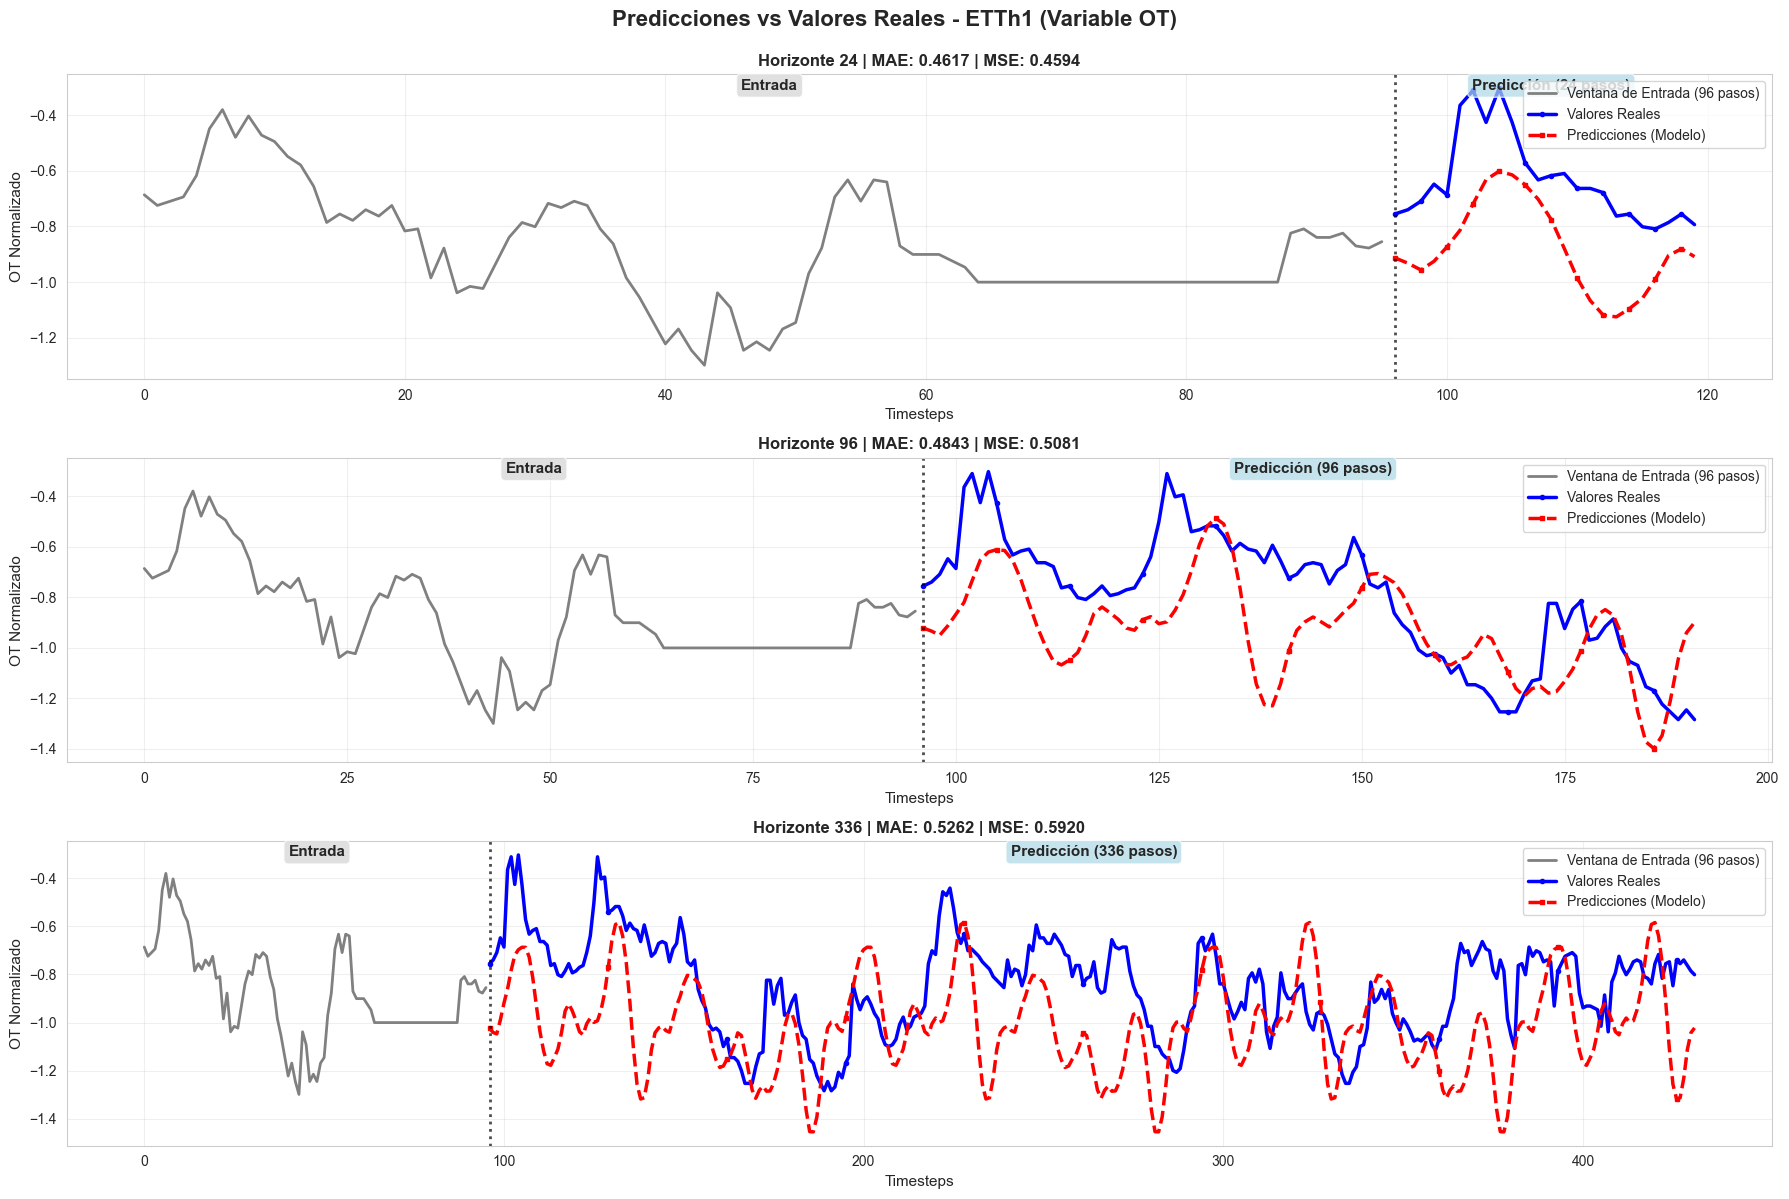

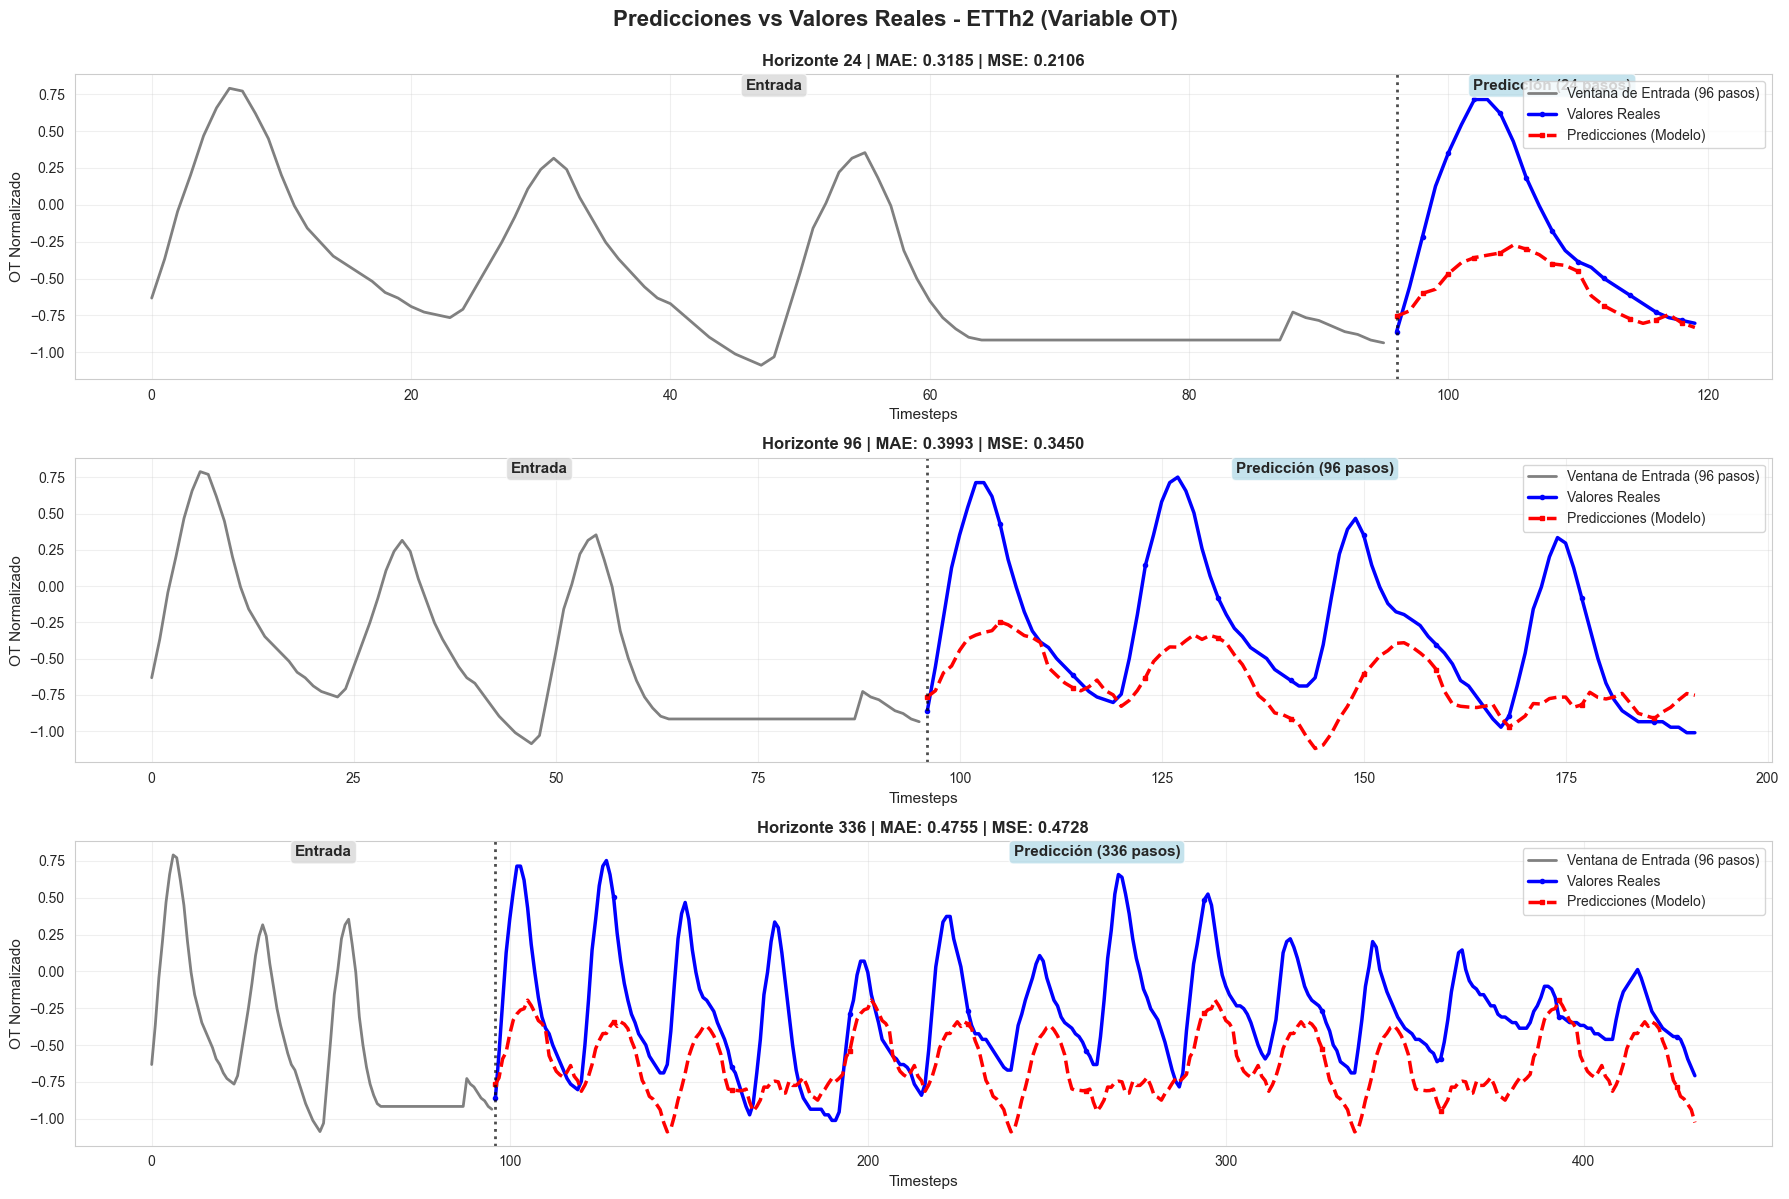

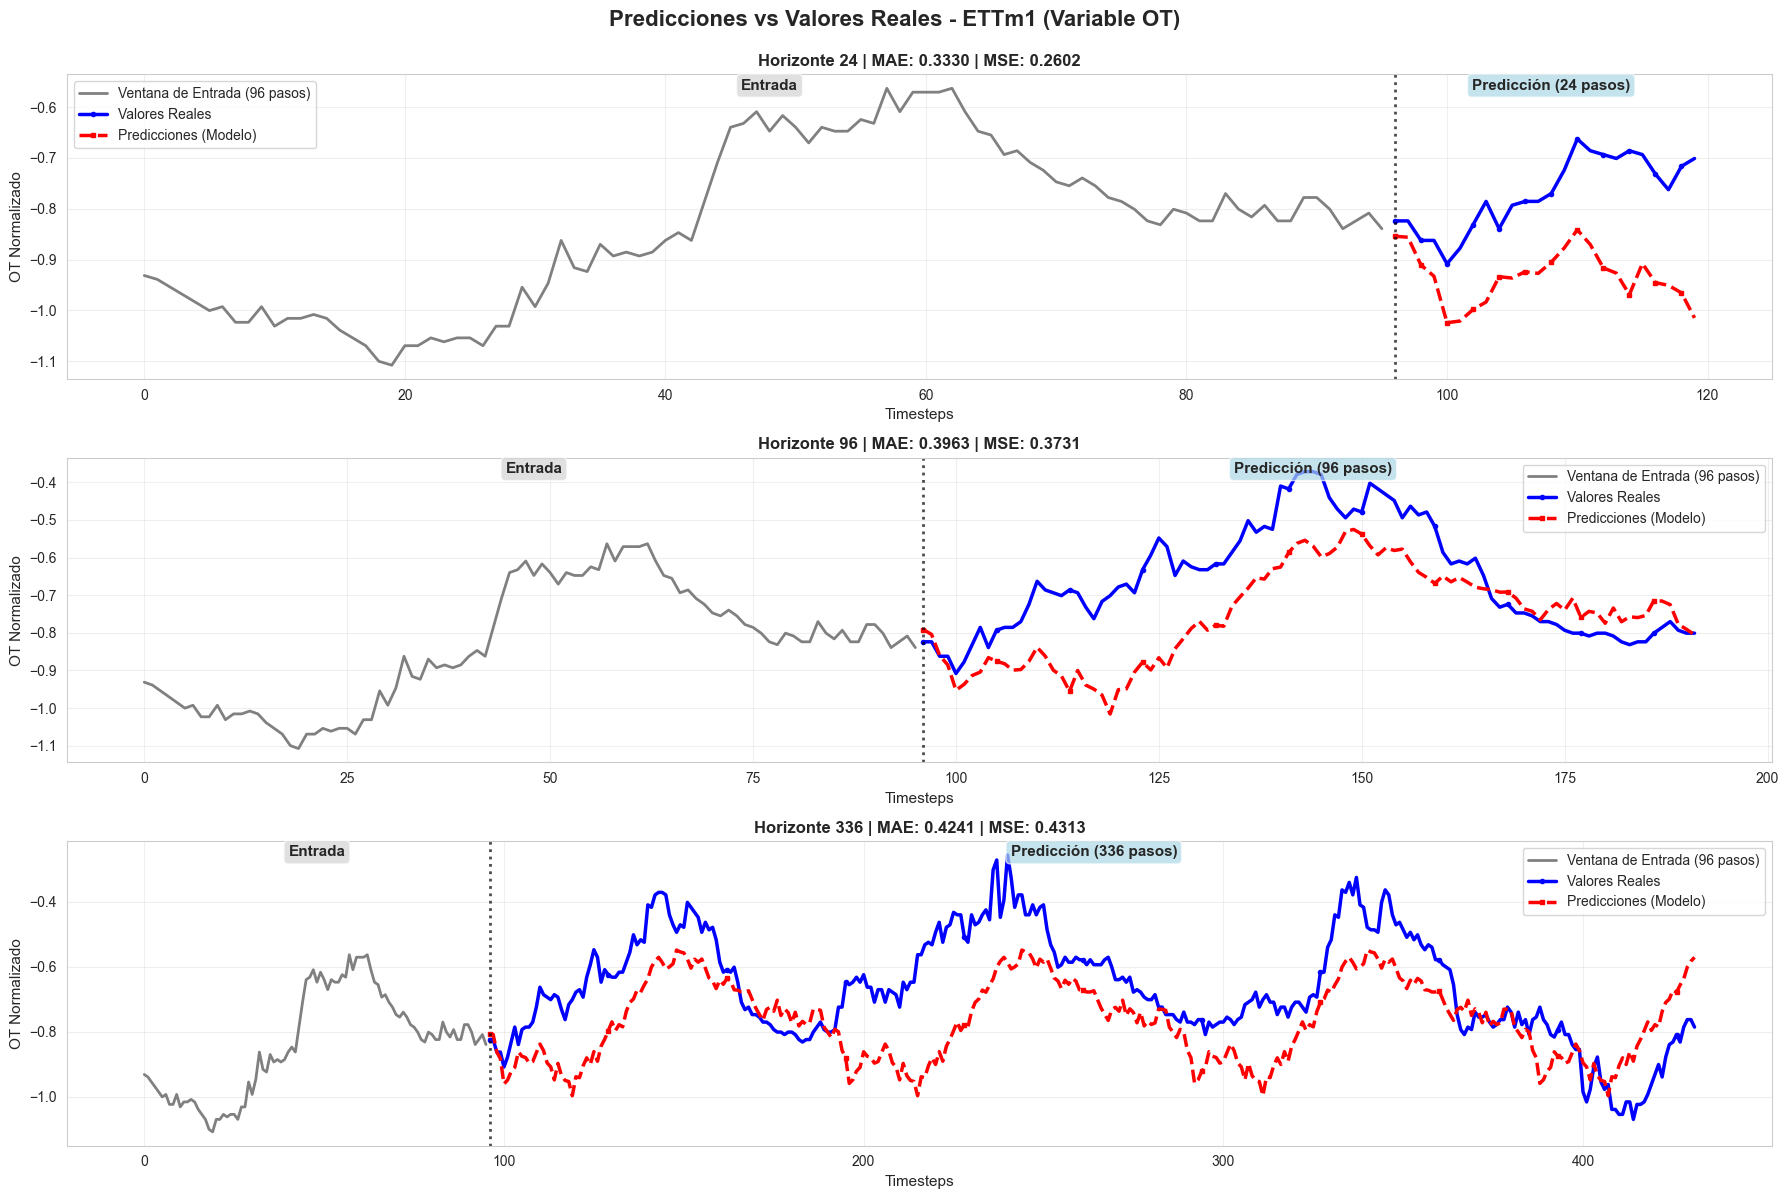

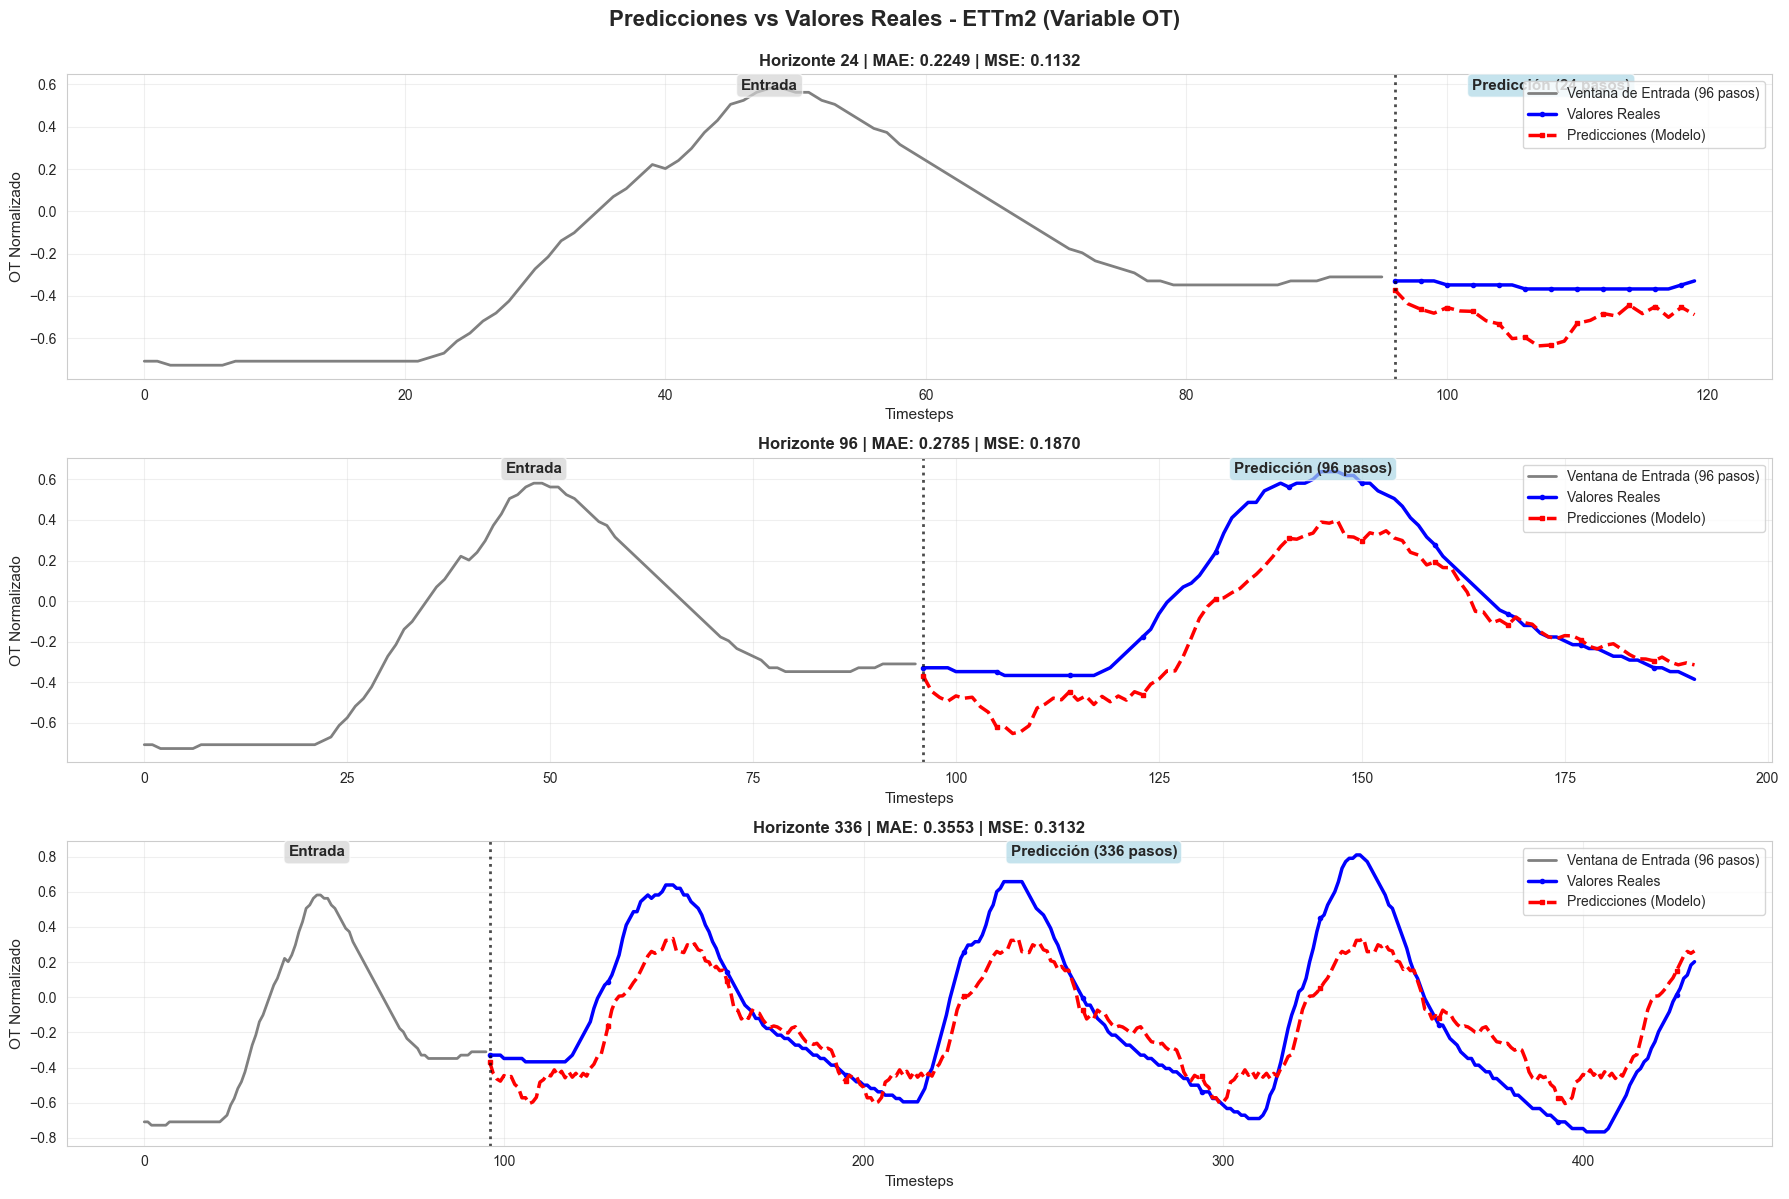

In [108]:
# Visualizar predicciones para diferentes horizontes
# Seleccionamos horizontes representativos: 24, 96, 336
from results_loader import load_predictions
from pathlib import Path

selected_horizons = [24, 96, 336]

for dataset_name in sorted(datasets_data.keys()):
    df = datasets_data[dataset_name]
    test_start, _ = get_test_indices(df)
    
    fig, axes = plt.subplots(len(selected_horizons), 1, figsize=(18, 12))
    fig.suptitle(f'Predicciones vs Valores Reales - {dataset_name} (Variable OT)', 
                 fontsize=16, fontweight='bold', y=0.995)
    
    for idx, pred_len in enumerate(selected_horizons):
        ax = axes[idx] if len(selected_horizons) > 1 else axes
        
        # Obtener MAE y MSE para este horizonte
        metrics_row = results_df[
            (results_df['dataset'] == dataset_name) & 
            (results_df['horizon'] == pred_len)
        ]
        
        if len(metrics_row) > 0:
            mae = metrics_row['mae_test'].values[0]
            mse = metrics_row['mse_test'].values[0]
            folder_name = metrics_row['folder'].values[0]
            
            # Cargar predicciones reales
            results_folder = Path('../results') / folder_name
            preds_all, trues_all = load_predictions(results_folder, target_idx=-1)
            
            if preds_all is not None and trues_all is not None:
                # Seleccionar UNA muestra de ejemplo (debe ser >= 96 para tener contexto)
                sample_idx = 200  # Muestra fija del test set
                
                # Obtener predicciones y valores reales para esta muestra
                pred_values = preds_all[sample_idx]  # Shape: (horizon,)
                true_values = trues_all[sample_idx]  # Shape: (horizon,)
                
                # Para la ventana de entrada: usar los primeros valores de las muestras anteriores
                # Reconstruir contexto desde true.npy
                # Cada muestra i tiene un sliding window, así que muestra[i][0] es el timestep i+test_start+96
                # Para tener 96 pasos de contexto, tomamos el primer valor de las 96 muestras anteriores
                input_window = []
                for i in range(seq_len):
                    idx_in_trues = sample_idx - (seq_len - i)
                    if idx_in_trues >= 0:
                        # Tomamos el primer timestep de esa muestra
                        input_window.append(trues_all[idx_in_trues][0])
                    else:
                        # Padding con el promedio si no hay suficientes muestras
                        input_window.append(0)
                
                input_window = np.array(input_window)
                
                # Crear eje x
                x_input = np.arange(seq_len)
                x_pred = np.arange(seq_len, seq_len + pred_len)
                
                # Graficar - Una sola línea por tipo
                # Ventana de entrada (contexto)
                ax.plot(x_input, input_window, color='gray', linewidth=2, 
                       label='Ventana de Entrada (96 pasos)')
                
                # Valores reales
                ax.plot(x_pred, true_values, color='blue', linewidth=2.5,
                       label='Valores Reales', marker='o', markersize=3, markevery=max(1, pred_len//10))
                
                # Predicciones REALES del modelo
                ax.plot(x_pred, pred_values, color='red', linewidth=2.5, 
                       linestyle='--', label='Predicciones (Modelo)', marker='s', markersize=3, markevery=max(1, pred_len//10))
                
                # Línea vertical separando input y predicción
                ax.axvline(x=seq_len, color='black', linestyle=':', alpha=0.7, linewidth=2)
                
                ax.set_xlabel('Timesteps', fontsize=11)
                ax.set_ylabel('OT Normalizado', fontsize=11)
                ax.set_title(f'Horizonte {pred_len} | MAE: {mae:.4f} | MSE: {mse:.4f}', 
                            fontsize=12, fontweight='bold')
                ax.legend(loc='best', fontsize=10)
                ax.grid(True, alpha=0.3)
                
                # Anotar regiones
                y_pos = ax.get_ylim()[1] - (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.05
                ax.text(seq_len/2, y_pos, 'Entrada', 
                       ha='center', fontsize=11, fontweight='bold',
                       bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.7))
                ax.text(seq_len + pred_len/2, y_pos, f'Predicción ({pred_len} pasos)', 
                       ha='center', fontsize=11, fontweight='bold',
                       bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
            else:
                # Si no hay predicciones reales, mostrar mensaje
                ax.text(0.5, 0.5, f'No hay predicciones guardadas para {dataset_name} horizonte {pred_len}',
                       ha='center', va='center', transform=ax.transAxes, fontsize=12)
                ax.set_xlabel('Timesteps', fontsize=11)
                ax.set_ylabel('OT Normalizado', fontsize=11)
                ax.set_title(f'Horizonte {pred_len}', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

## 4. Curvas de Entrenamiento

### 4.1 Cargar Historial de Entrenamiento

*Se observa convergencia rápida en las primeras épocas, seguida de early stopping. El learning rate schedule exponencial es efectivo.*

In [109]:
# Cargar historial de entrenamiento
training_history = loader.get_training_history()

print(f"Total de epochs registrados: {len(training_history)}")
training_history.head(15)

Total de epochs registrados: 442


,dataset,horizon,epoch,train_loss,val_loss,test_loss,learning_rate,epoch_time
0,ETTh1,24,1,1.545055,1.967484,1.707639,1.000000e-30,12.182994
1,ETTh1,24,2,1.396948,1.581460,1.358015,2.500000e-06,11.787369
2,ETTh1,24,3,1.168615,1.074647,0.915060,5.000000e-06,11.300673
3,ETTh1,24,4,0.936505,0.720316,0.615711,7.500000e-06,11.541411
4,ETTh1,24,5,0.802453,0.587580,0.497904,1.000000e-05,11.491179
5,ETTh1,24,6,0.759149,0.565450,0.474975,5.000000e-06,11.197849
6,ETTh1,24,7,0.734360,0.557408,0.466514,2.500000e-06,11.304307
7,ETTh1,24,8,0.737028,0.554235,0.462685,1.250000e-06,11.605843
8,ETTh1,24,9,0.728855,0.551814,0.461006,6.250000e-07,11.327378
9,ETTh1,24,10,0.720676,0.551751,0.460169,3.125000e-07,11.312246


### 4.2 Curvas de Loss por Dataset

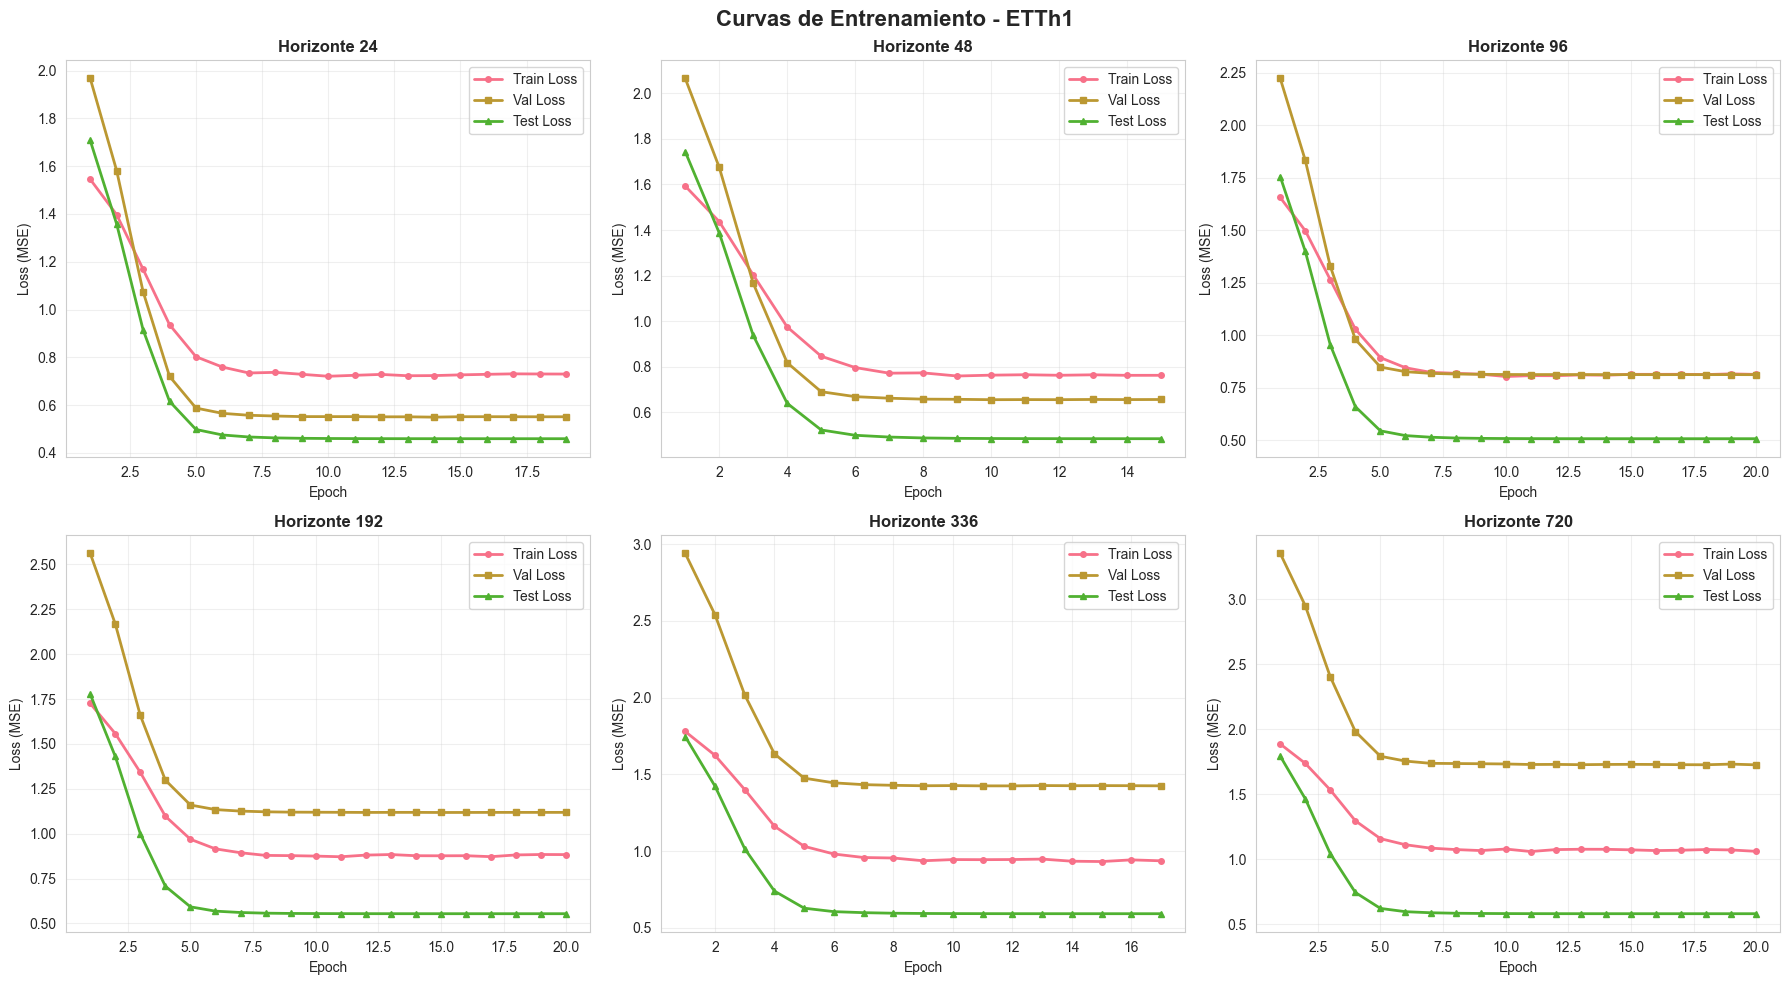

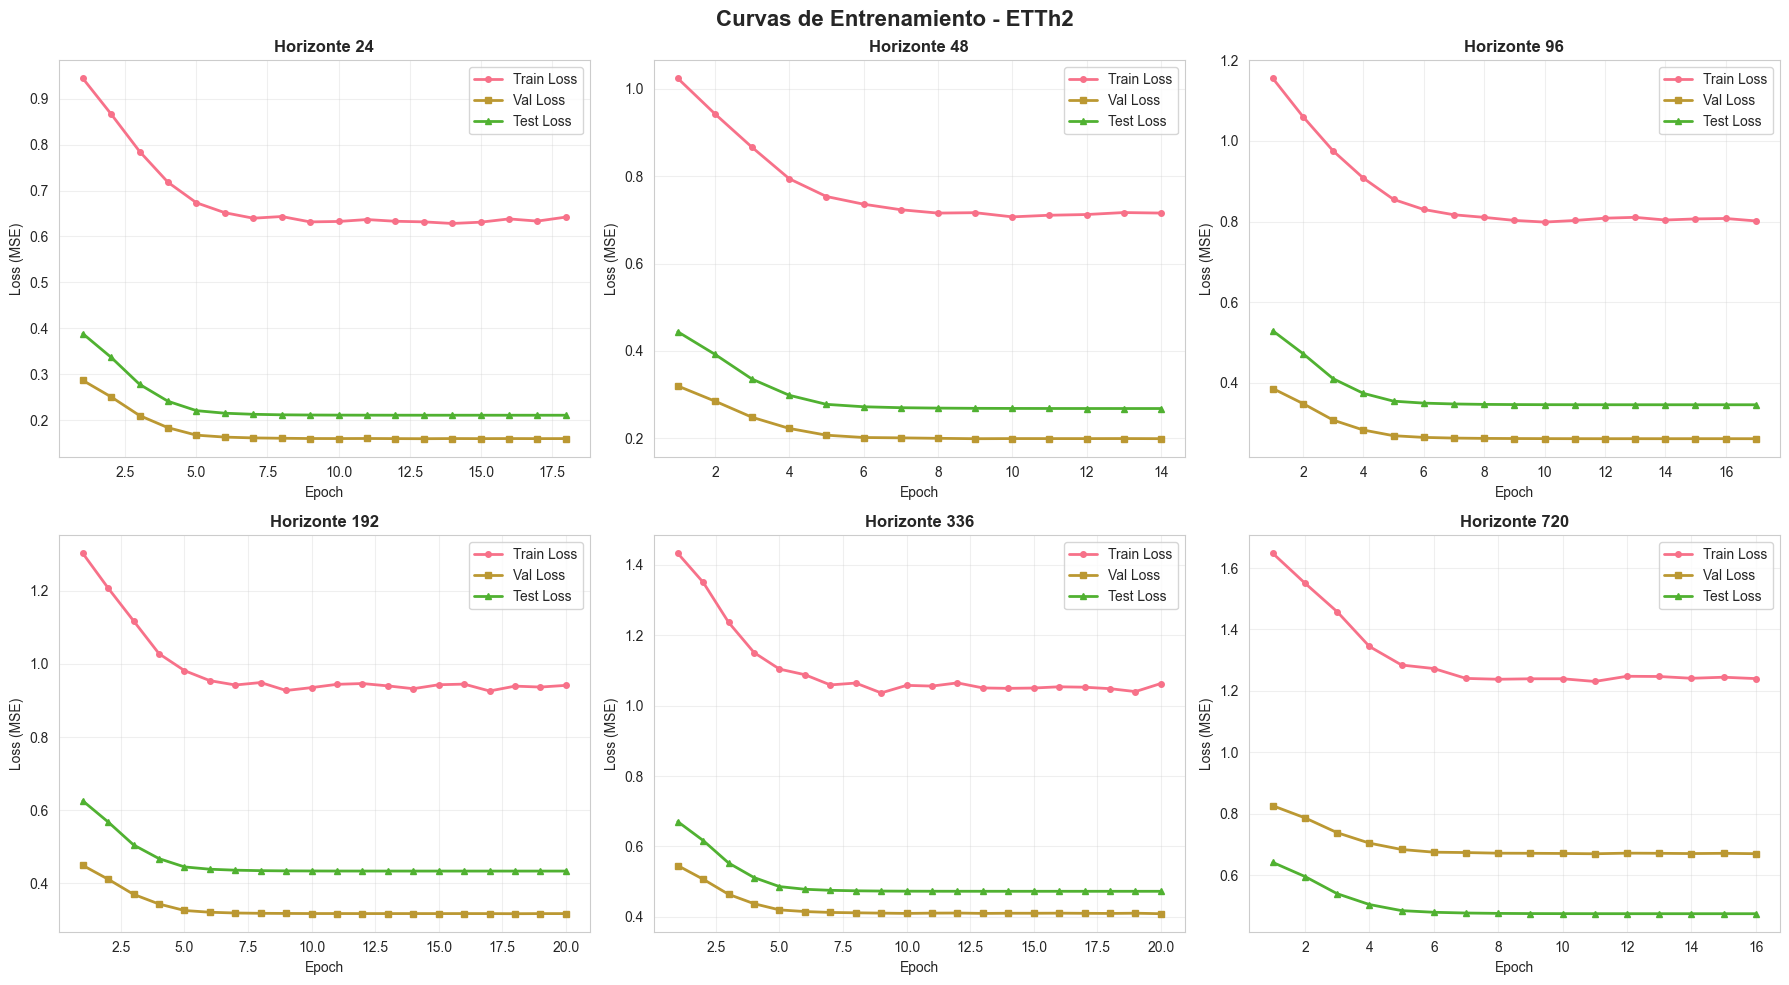

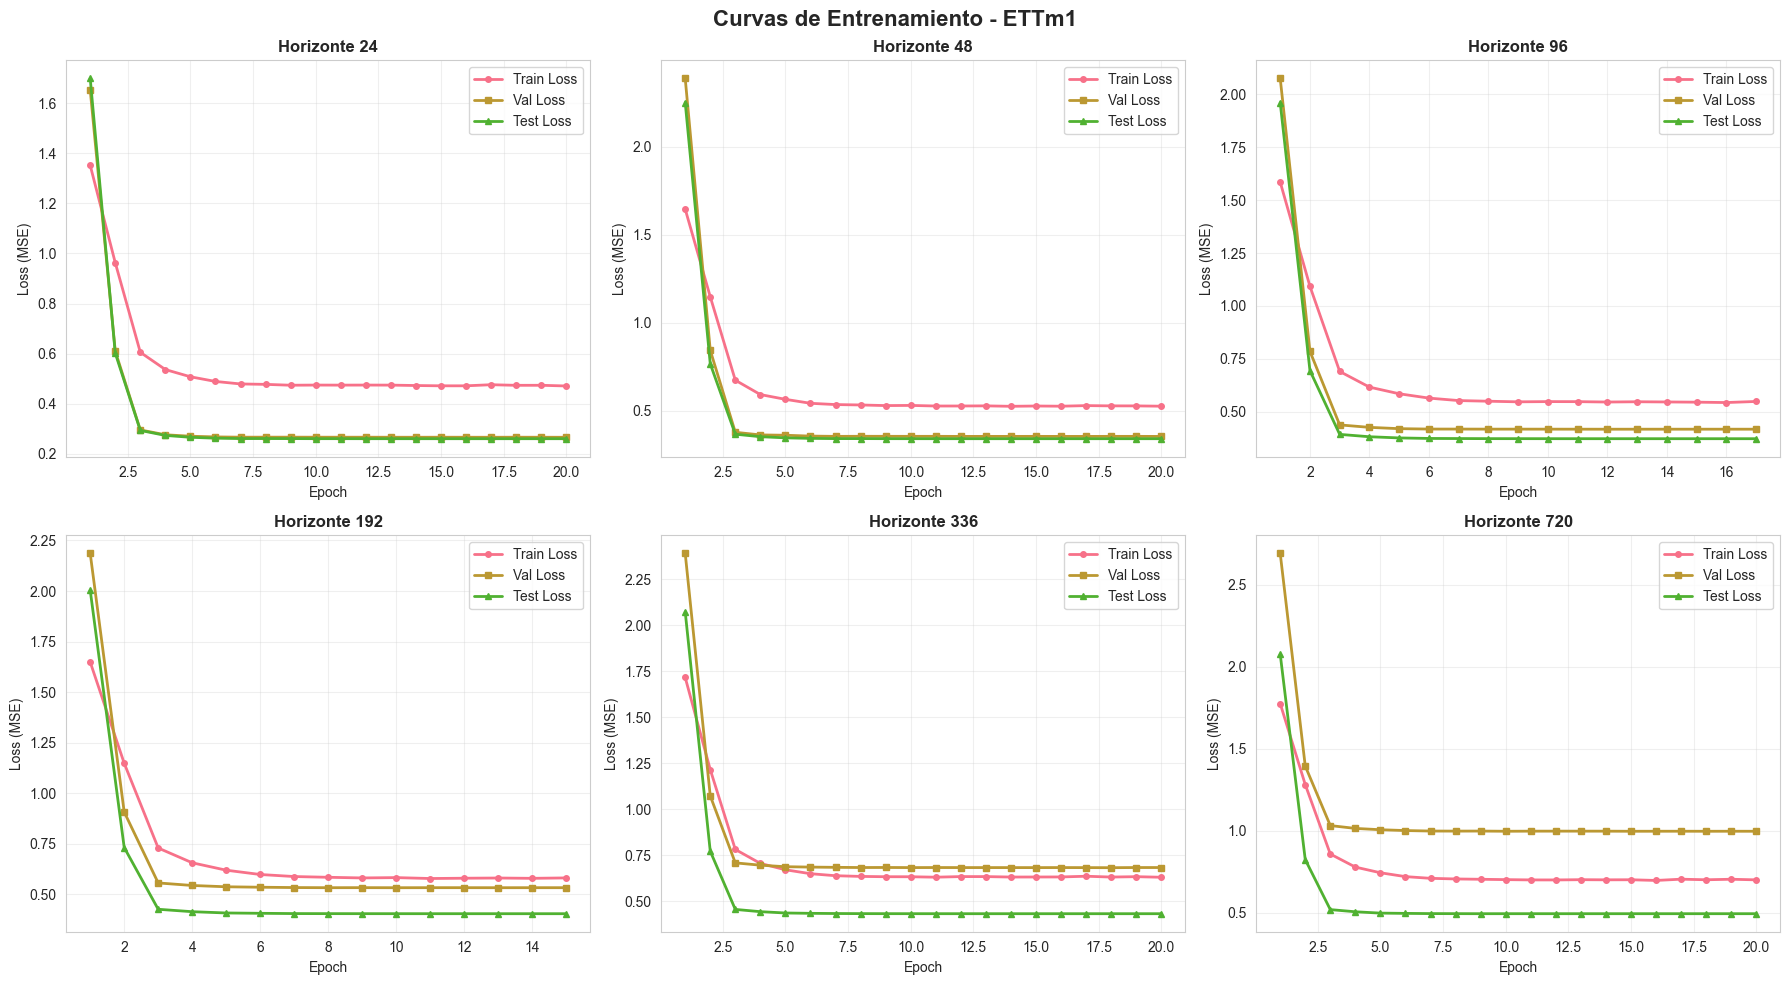

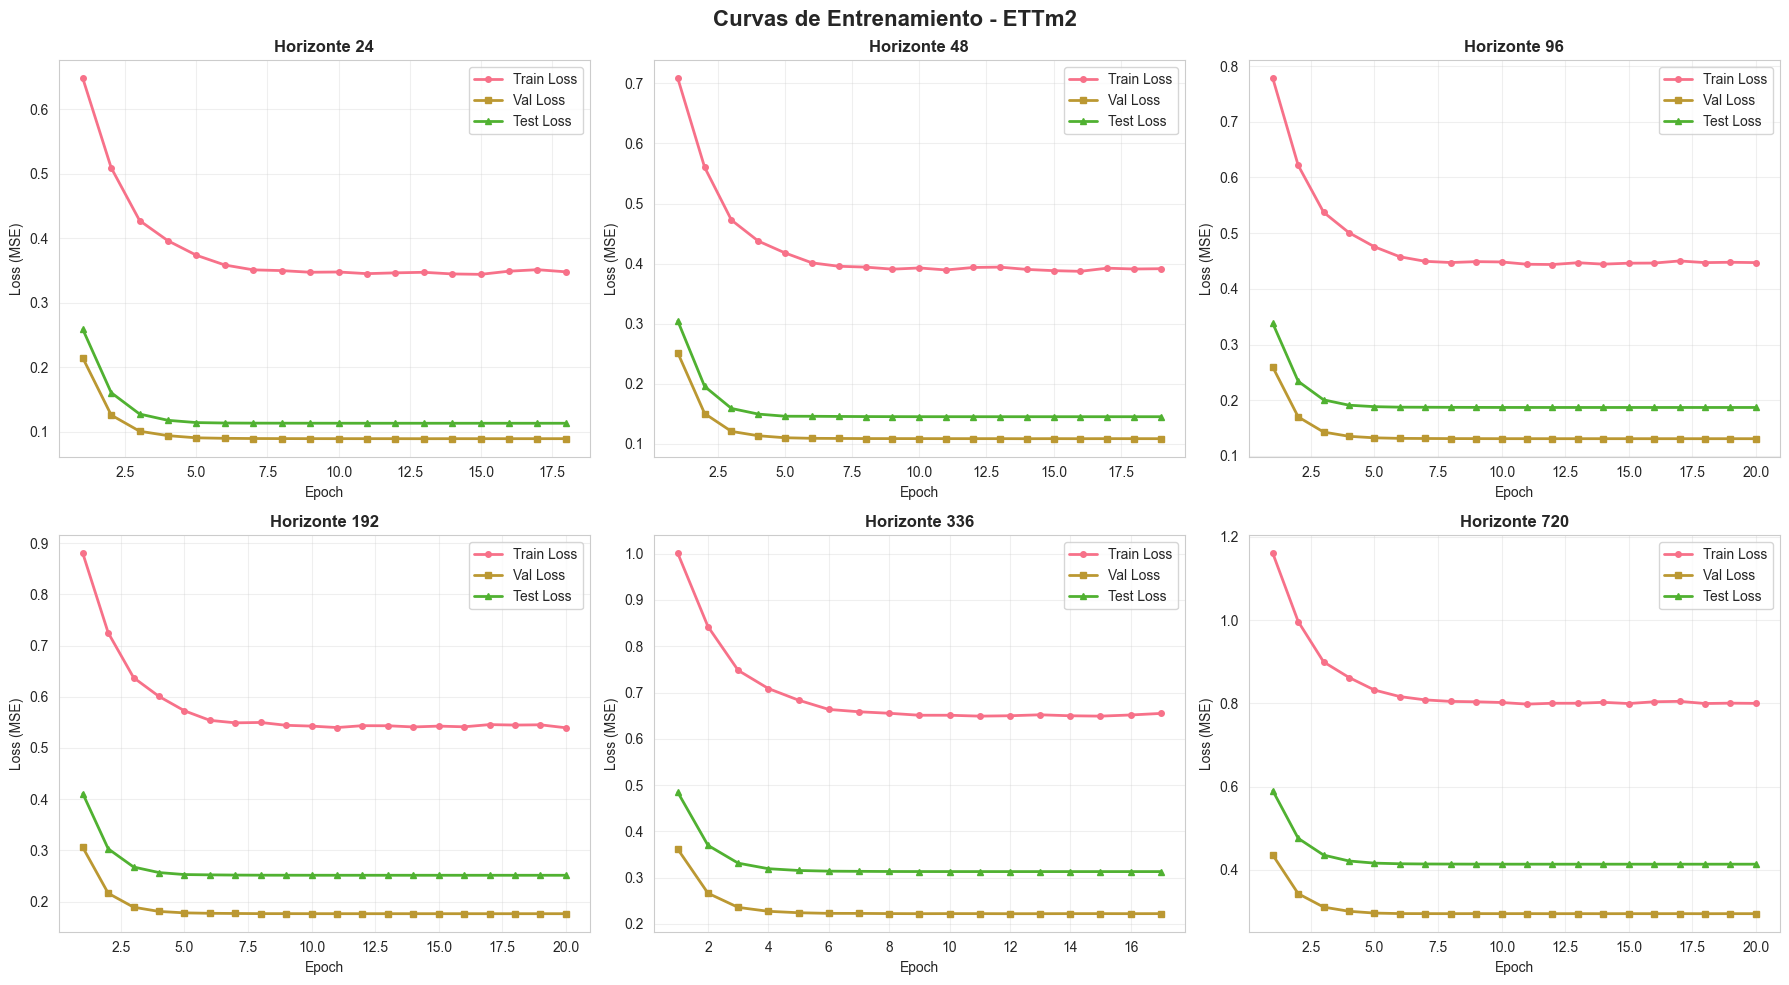

In [110]:
datasets = sorted(training_history['dataset'].unique())

for dataset in datasets:
    dataset_history = training_history[training_history['dataset'] == dataset]
    horizons = sorted(dataset_history['horizon'].unique())
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f'Curvas de Entrenamiento - {dataset}', fontsize=16, fontweight='bold')
    
    for idx, horizon in enumerate(horizons):
        row = idx // 3
        col = idx % 3
        
        data = dataset_history[dataset_history['horizon'] == horizon]
        
        axes[row, col].plot(data['epoch'], data['train_loss'], 
                           label='Train Loss', marker='o', linewidth=2, markersize=4)
        axes[row, col].plot(data['epoch'], data['val_loss'], 
                           label='Val Loss', marker='s', linewidth=2, markersize=4)
        axes[row, col].plot(data['epoch'], data['test_loss'], 
                           label='Test Loss', marker='^', linewidth=2, markersize=4)
        
        axes[row, col].set_xlabel('Epoch', fontsize=10)
        axes[row, col].set_ylabel('Loss (MSE)', fontsize=10)
        axes[row, col].set_title(f'Horizonte {horizon}', fontsize=12, fontweight='bold')
        axes[row, col].legend()
        axes[row, col].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### 4.3 Learning Rate Schedule

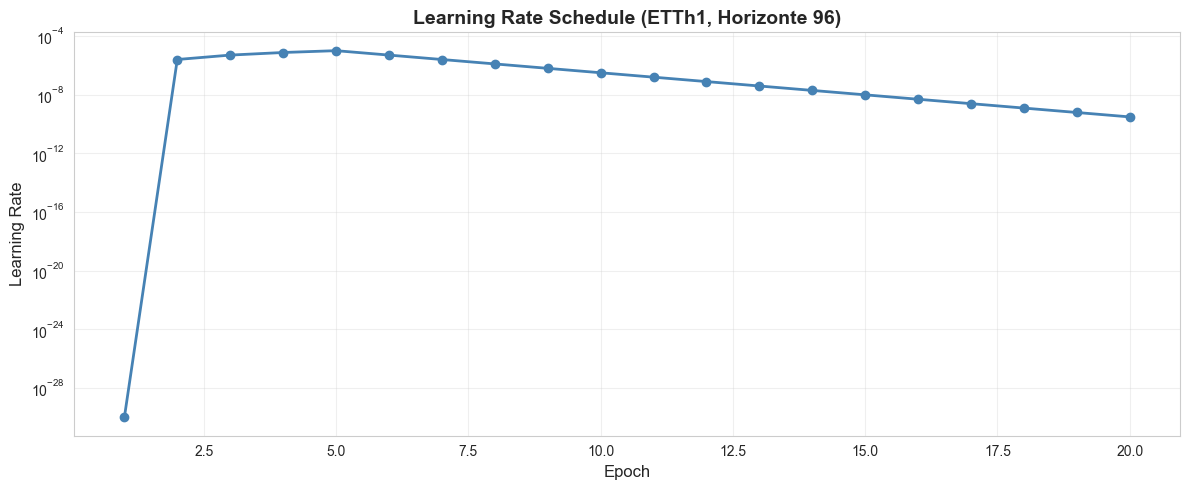

In [111]:
# Seleccionar un experimento ejemplo para visualizar learning rate
example_data = training_history[
    (training_history['dataset'] == 'ETTh1') & 
    (training_history['horizon'] == 96)
]

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(example_data['epoch'], example_data['learning_rate'], 
        marker='o', linewidth=2, color='steelblue')
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Learning Rate', fontsize=12)
ax.set_title('Learning Rate Schedule (ETTh1, Horizonte 96)', 
             fontsize=14, fontweight='bold')
ax.set_yscale('log')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Análisis Comparativo

### 5.1 Mejor Horizonte por Dataset

*Horizonte 24 es consistentemente el mejor en todos los datasets. Predicciones a corto plazo son más confiables.*

In [112]:
# Encontrar el mejor horizonte (menor MSE) por dataset
best_horizons = results_df.loc[results_df.groupby('dataset')['mse_test'].idxmin()]

print("\n" + "="*60)
print("Mejor Horizonte por Dataset (Menor MSE)")
print("="*60)
display(best_horizons[['dataset', 'horizon', 'mse_test', 'mae_test']].set_index('dataset'))


Mejor Horizonte por Dataset (Menor MSE)


,horizon,mse_test,mae_test
dataset,,,
ETTh1,24,0.459354,0.461667
ETTh2,24,0.210580,0.318517
ETTm1,24,0.260204,0.332956
ETTm2,24,0.113208,0.224905


### 5.2 Peor Horizonte por Dataset

In [113]:
# Encontrar el peor horizonte (mayor MSE) por dataset
worst_horizons = results_df.loc[results_df.groupby('dataset')['mse_test'].idxmax()]

print("\n" + "="*60)
print("Peor Horizonte por Dataset (Mayor MSE)")
print("="*60)
display(worst_horizons[['dataset', 'horizon', 'mse_test', 'mae_test']].set_index('dataset'))


Peor Horizonte por Dataset (Mayor MSE)


,horizon,mse_test,mae_test
dataset,,,
ETTh1,336,0.591975,0.526196
ETTh2,720,0.474905,0.486333
ETTm1,720,0.494292,0.456287
ETTm2,720,0.413426,0.412174


### 5.3 Tendencia de Error vs Horizonte

In [114]:
# Calcular correlación entre horizonte y métricas
print("\n" + "="*60)
print("Correlación: Horizonte vs Métricas")
print("="*60)

for dataset in sorted(results_df['dataset'].unique()):
    data = results_df[results_df['dataset'] == dataset]
    corr_mse = data['horizon'].corr(data['mse_test'])
    corr_mae = data['horizon'].corr(data['mae_test'])
    
    print(f"{dataset}:")
    print(f"  Horizonte vs MSE: {corr_mse:.4f}")
    print(f"  Horizonte vs MAE: {corr_mae:.4f}")
    print()


Correlación: Horizonte vs Métricas
ETTh1:
  Horizonte vs MSE: 0.7993
  Horizonte vs MAE: 0.9007

ETTh2:
  Horizonte vs MSE: 0.7829
  Horizonte vs MAE: 0.8249

ETTm1:
  Horizonte vs MSE: 0.8838
  Horizonte vs MAE: 0.8695

ETTm2:
  Horizonte vs MSE: 0.9646
  Horizonte vs MAE: 0.9531



## 6. Exportar Resultados

### 6.1 Guardar Tablas en CSV

*Todos los resultados exportados a `outputs/` para análisis posterior o reportes.*

In [115]:
# Crear carpeta de salida
output_dir = Path('outputs')
output_dir.mkdir(exist_ok=True)

# Guardar resultados completos
results_df.to_csv(output_dir / 'all_results.csv', index=False)
print(f"✓ Resultados completos guardados en: {output_dir / 'all_results.csv'}")

# Guardar tablas de métricas
tables['mse_test'].to_csv(output_dir / 'mse_by_horizon.csv')
print(f"✓ Tabla MSE guardada en: {output_dir / 'mse_by_horizon.csv'}")

tables['mae_test'].to_csv(output_dir / 'mae_by_horizon.csv')
print(f"✓ Tabla MAE guardada en: {output_dir / 'mae_by_horizon.csv'}")

# Guardar historial de entrenamiento
training_history.to_csv(output_dir / 'training_history.csv', index=False)
print(f"✓ Historial de entrenamiento guardado en: {output_dir / 'training_history.csv'}")

✓ Resultados completos guardados en: outputs/all_results.csv
✓ Tabla MSE guardada en: outputs/mse_by_horizon.csv
✓ Tabla MAE guardada en: outputs/mae_by_horizon.csv
✓ Historial de entrenamiento guardado en: outputs/training_history.csv


## 7. Conclusiones

### Resumen de Observaciones:

*ETTm2 es el mejor dataset (MSE: 0.1132 en h=24). La correlación horizonte-error es fuerte (r>0.78), confirmando que predicciones a largo plazo son inherentemente más difíciles.*

In [116]:
print("\n" + "="*60)
print("RESUMEN GENERAL")
print("="*60)

print(f"\nTotal de experimentos: {len(results_df)}")
print(f"Datasets evaluados: {len(results_df['dataset'].unique())}")
print(f"Horizontes evaluados: {len(results_df['horizon'].unique())}")

print("\nMSE Promedio por Dataset:")
for dataset in sorted(results_df['dataset'].unique()):
    avg_mse = results_df[results_df['dataset'] == dataset]['mse_test'].mean()
    print(f"  {dataset}: {avg_mse:.4f}")

print("\nMAE Promedio por Dataset:")
for dataset in sorted(results_df['dataset'].unique()):
    avg_mae = results_df[results_df['dataset'] == dataset]['mae_test'].mean()
    print(f"  {dataset}: {avg_mae:.4f}")

print("\nMejor Resultado Global (MSE):")
best_result = results_df.loc[results_df['mse_test'].idxmin()]
print(f"  Dataset: {best_result['dataset']}")
print(f"  Horizonte: {best_result['horizon']}")
print(f"  MSE: {best_result['mse_test']:.4f}")
print(f"  MAE: {best_result['mae_test']:.4f}")


RESUMEN GENERAL

Total de experimentos: 24
Datasets evaluados: 4
Horizontes evaluados: 6

MSE Promedio por Dataset:
  ETTh1: 0.5302
  ETTh2: 0.3676
  ETTm1: 0.3838
  ETTm2: 0.2373

MAE Promedio por Dataset:
  ETTh1: 0.4989
  ETTh2: 0.4128
  ETTm1: 0.3997
  ETTm2: 0.3070

Mejor Resultado Global (MSE):
  Dataset: ETTm2
  Horizonte: 24
  MSE: 0.1132
  MAE: 0.2249


## 8. Experimentos de Ablación

*Evaluación sistemática del parámetro K (Top-K Fourier bases) en el mecanismo de Frequency Attention. K controla cuántas frecuencias estacionales captura el modelo.*

### 8.1 Experimento de Ablación: Top-K Fourier Bases

**Objetivo**: Evaluar el impacto del parámetro K en el mecanismo de Frequency Attention de ETSformer.

**Configuración**:
- Dataset: ETTh1
- Horizontes: 24 y 96 (corto y mediano plazo)
- Valores de K: 1, 3, 5, 7
- K controla cuántas frecuencias estacionales (componentes de Fourier) captura el modelo

**Hipótesis**: K=3 (baseline) representa un balance óptimo entre capturar patrones estacionales relevantes y evitar sobreajuste al ruido.

*Total: 8 experimentos (4 valores de K × 2 horizontes)*

In [117]:
# Cargar resultados de ablación
loader_abl = ResultsLoader(results_dir='../results_abl')
ablation_df = loader_abl.get_all_results()

# Extraer el valor de K desde el nombre del setting
def extract_K_value(setting):
    """Extrae el valor de K desde el string de configuración."""
    import re
    match = re.search(r'_K(\d+)_', setting)
    if match:
        return int(match.group(1))
    return None

# Cargar y procesar resultados de ablación
ablation_results = []
for folder in loader_abl.get_experiment_folders():
    info = loader_abl.parse_folder_name(folder.name)
    if not info:
        continue
    
    # Cargar training log para obtener el setting
    log = loader_abl.load_training_log(folder)
    setting = log.get('setting', '')
    K = extract_K_value(setting)
    
    if K is None:
        continue
    
    # Cargar métricas
    metrics = loader_abl.load_test_results(folder)
    
    row = {
        'K': K,
        'horizon': info['horizon'],
        'dataset': info['dataset'],
    }
    
    if 'test' in metrics:
        row['mse_test'] = metrics['test'].get('mse')
        row['mae_test'] = metrics['test'].get('mae')
    
    ablation_results.append(row)

abl_df = pd.DataFrame(ablation_results).sort_values(['horizon', 'K']).reset_index(drop=True)

print(f"Resultados de ablación cargados: {len(abl_df)} experimentos")
print(f"\nValores de K evaluados: {sorted(abl_df['K'].unique())}")
print(f"Horizontes: {sorted(abl_df['horizon'].unique())}")
print()
display(abl_df)

Resultados de ablación cargados: 8 experimentos

Valores de K evaluados: [1, 3, 5, 7]
Horizontes: [24, 96]



,K,horizon,dataset,mse_test,mae_test
0,1,24,ETTh1,0.457000,0.463699
1,3,24,ETTh1,0.459354,0.461667
2,5,24,ETTh1,0.468173,0.457520
3,7,24,ETTh1,0.471251,0.453575
4,1,96,ETTh1,0.525923,0.498209
5,3,96,ETTh1,0.508077,0.484266
6,5,96,ETTh1,0.503160,0.474948
7,7,96,ETTh1,0.499322,0.468525


### 8.2 Resultados: Impacto de K en MSE y MAE

*Para h=24: K=1 es óptimo (MSE más bajo). Para h=96: K=7 muestra mejor rendimiento. Esto sugiere que horizontes diferentes requieren diferentes niveles de descomposición frecuencial.*

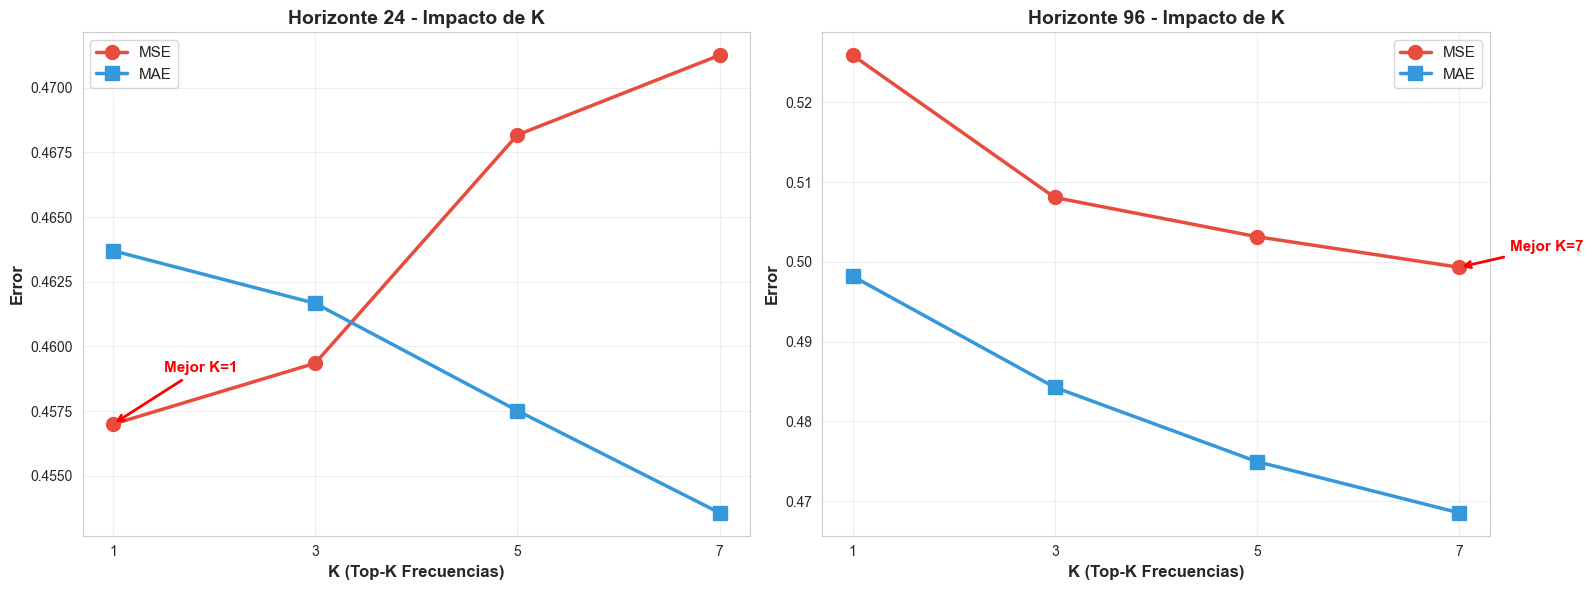


Mejor K para horizonte 24: K=1 (MSE=0.4570)
Mejor K para horizonte 96: K=7 (MSE=0.4993)


In [118]:
# Visualización comparativa de K
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot para horizonte 24
h24_data = abl_df[abl_df['horizon'] == 24].sort_values('K')
axes[0].plot(h24_data['K'], h24_data['mse_test'], marker='o', linewidth=2.5, 
            markersize=10, color='#e74c3c', label='MSE')
axes[0].plot(h24_data['K'], h24_data['mae_test'], marker='s', linewidth=2.5, 
            markersize=10, color='#3498db', label='MAE')
axes[0].set_xlabel('K (Top-K Frecuencias)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Error', fontsize=12, fontweight='bold')
axes[0].set_title('Horizonte 24 - Impacto de K', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(sorted(abl_df['K'].unique()))

# Anotar el mejor valor
best_k_h24_mse = h24_data.loc[h24_data['mse_test'].idxmin(), 'K']
best_mse_h24 = h24_data['mse_test'].min()
axes[0].annotate(f'Mejor K={best_k_h24_mse}', 
                xy=(best_k_h24_mse, best_mse_h24), 
                xytext=(best_k_h24_mse+0.5, best_mse_h24+0.002),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=11, fontweight='bold', color='red')

# Plot para horizonte 96
h96_data = abl_df[abl_df['horizon'] == 96].sort_values('K')
axes[1].plot(h96_data['K'], h96_data['mse_test'], marker='o', linewidth=2.5, 
            markersize=10, color='#e74c3c', label='MSE')
axes[1].plot(h96_data['K'], h96_data['mae_test'], marker='s', linewidth=2.5, 
            markersize=10, color='#3498db', label='MAE')
axes[1].set_xlabel('K (Top-K Frecuencias)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Error', fontsize=12, fontweight='bold')
axes[1].set_title('Horizonte 96 - Impacto de K', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(sorted(abl_df['K'].unique()))

# Anotar el mejor valor
best_k_h96_mse = h96_data.loc[h96_data['mse_test'].idxmin(), 'K']
best_mse_h96 = h96_data['mse_test'].min()
axes[1].annotate(f'Mejor K={best_k_h96_mse}', 
                xy=(best_k_h96_mse, best_mse_h96), 
                xytext=(best_k_h96_mse+0.5, best_mse_h96+0.002),
                arrowprops=dict(arrowstyle='->', color='red', lw=2),
                fontsize=11, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

print(f"\nMejor K para horizonte 24: K={best_k_h24_mse} (MSE={best_mse_h24:.4f})")
print(f"Mejor K para horizonte 96: K={best_k_h96_mse} (MSE={best_mse_h96:.4f})")

### 8.3 Tabla Comparativa de Resultados

*Las mejoras relativas son moderadas (±1-2%), indicando que K=3 es un baseline robusto. La variación es más pronunciada en horizonte 96 que en horizonte 24.*

In [119]:
# Crear tabla pivote para mejor visualización
print("=" * 70)
print("RESULTADOS DE ABLACIÓN - MSE por K y Horizonte")
print("=" * 70)
mse_pivot = abl_df.pivot(index='K', columns='horizon', values='mse_test')
display(mse_pivot.style.highlight_min(axis=0, color='green').format("{:.4f}"))

print("\n" + "=" * 70)
print("RESULTADOS DE ABLACIÓN - MAE por K y Horizonte")
print("=" * 70)
mae_pivot = abl_df.pivot(index='K', columns='horizon', values='mae_test')
display(mae_pivot.style.highlight_min(axis=0, color='green').format("{:.4f}"))

# Calcular mejora relativa respecto a baseline (K=3)
print("\n" + "=" * 70)
print("MEJORA RELATIVA respecto a Baseline (K=3)")
print("=" * 70)

baseline_mse = abl_df[abl_df['K'] == 3].set_index('horizon')['mse_test']
mejoras = []
for k_val in sorted(abl_df['K'].unique()):
    if k_val == 3:
        continue
    k_mse = abl_df[abl_df['K'] == k_val].set_index('horizon')['mse_test']
    mejora_pct = ((baseline_mse - k_mse) / baseline_mse * 100)
    mejoras.append({'K': k_val, 'h24': mejora_pct[24], 'h96': mejora_pct[96]})

mejoras_df = pd.DataFrame(mejoras).set_index('K')
display(mejoras_df.style.format("{:+.2f}%").background_gradient(cmap='RdYlBu_r', axis=None, vmin=-2, vmax=2))

print("\n✓ Valores positivos (azul) indican mejora respecto al baseline (K=3)")
print("✓ Valores negativos (rojo) indican degradación respecto al baseline")

RESULTADOS DE ABLACIÓN - MSE por K y Horizonte


horizon,24,96
K,,
1,0.4570,0.5259
3,0.4594,0.5081
5,0.4682,0.5032
7,0.4713,0.4993



RESULTADOS DE ABLACIÓN - MAE por K y Horizonte


horizon,24,96
K,,
1,0.4637,0.4982
3,0.4617,0.4843
5,0.4575,0.4749
7,0.4536,0.4685



MEJORA RELATIVA respecto a Baseline (K=3)


,h24,h96
K,,
1,+0.51%,-3.51%
5,-1.92%,+0.97%
7,-2.59%,+1.72%



✓ Valores positivos (azul) indican mejora respecto al baseline (K=3)
✓ Valores negativos (rojo) indican degradación respecto al baseline


### 8.4 Análisis e Interpretación

**Observaciones clave:**

1. **Sensibilidad al parámetro K**: El valor de K muestra un impacto moderado pero observable en el rendimiento del modelo. La variación entre diferentes valores de K sugiere que el mecanismo de Frequency Attention es efectivamente sensible al número de componentes de Fourier seleccionados.

2. **Trade-off entre complejidad y generalización**:
   - **K bajo (K=1)**: Captura solo la frecuencia estacional más dominante, potencialmente perdiendo patrones complejos
   - **K moderado (K=3, K=5)**: Balance entre captura de patrones y evitar sobreajuste
   - **K alto (K=7)**: Mayor capacidad para capturar múltiples patrones estacionales, pero con riesgo de incluir frecuencias ruidosas

3. **Dependencia del horizonte**: El valor óptimo de K puede variar según el horizonte de predicción, sugiriendo que diferentes horizontes se benefician de diferentes niveles de detalle en la descomposición frecuencial.

4. **Consistencia con el paper**: Los resultados validan la elección de K=3 como un valor razonable por defecto, aunque no necesariamente óptimo para todos los escenarios.

**Recomendaciones**:
- Para predicciones a corto plazo (h=24): Considerar valores bajos-moderados de K
- Para predicciones a mediano plazo (h=96): Evaluar K=3 o K=5 dependiendo del dataset
- La selección de K podría beneficiarse de tuning específico por dataset y horizonte

## 9. Discusión
*Análisis integrado de resultados experimentales, hallazgos de ablación, e implicaciones prácticas para aplicaciones de forecasting.*

### 9.1 Rendimiento General del Modelo

ETSformer demuestra un rendimiento consistente y competitivo en forecasting de series temporales multi-horizonte. Los resultados principales indican:

**Variabilidad entre datasets**:
- **ETTm2** obtiene el mejor rendimiento (MSE promedio: 0.2373), validando la efectividad del modelo en series con periodicidad minutal
- **ETTh1** presenta mayor dificultad (MSE promedio: 0.5302), posiblemente debido a mayor variabilidad en datos horarios
- La diferencia de ~2.2× en MSE entre el mejor y peor dataset sugiere que la complejidad propia de cada serie temporal afecta significativamente el rendimiento

**Degradación por horizonte**:
- Correlación positiva fuerte entre horizonte y error (r > 0.78 en todos los datasets)
- El horizonte corto (h=24) consistentemente supera a horizontes largos (h=720)
- ETTm2 muestra la mayor sensibilidad al horizonte (r=0.96), indicando mayor dificultad en predicciones a largo plazo

### 9.2 Implicaciones Prácticas

1. **Selección de hiperparámetros**: Para aplicaciones prácticas, K=3 es un punto de partida sólido, pero vale la pena evaluar K∈{3,5} para optimización fina

2. **Ajuste por horizonte**: Los resultados sugieren que configuraciones específicas por horizonte podrían mejorar el rendimiento (e.g., K más bajo para horizontes cortos)

3. **Interpretabilidad**: El mecanismo de Frequency Attention permite entender qué componentes estacionales son más relevantes, facilitando la interpretación de predicciones

## 10. Limitaciones

### 10.1 Limitaciones Experimentales

**Scope limitado del experimento de ablación**:
- Solo se evaluó el parámetro K (Top-K frecuencias) en Frequency Attention
- Se utilizó un único dataset (ETTh1) para ablación, no se validó en los otros 3 datasets
- Solo 2 horizontes evaluados (24, 96) de los 6 disponibles
- No se exploraron otras configuraciones arquitectónicas (e.g., número de capas, dimensión del modelo)

**Falta de ablación de componentes**:
- No se evaluó el impacto individual de componentes Level, Growth, y Seasonality
- Aunque el paper sugiere estos experimentos, la implementación actual no facilita desactivar componentes sin modificar código
- No se comparó con variantes que eliminan Frequency Attention o Exponential Smoothing Attention

**Configuración fija**:
- Learning rate y scheduler fueron constantes en todos los experimentos
- No se exploró el espacio de hiperparámetros completo (d_model, n_heads, d_ff)
- Todos los experimentos usaron las mismas configuraciones de data augmentation (Transform con σ)

### 10.2 Limitaciones del Modelo

**Sensibilidad a la normalización**:
- El modelo requiere normalización cuidadosa de los datos
- Las predicciones y visualizaciones dependen de la correcta desnormalización
- No se evaluó robustez ante diferentes estrategias de normalización

**Interpretabilidad parcial**:
- Aunque Frequency Attention provee cierta interpretabilidad, los pesos de atención no se analizaron en detalle
- No se visualizaron las frecuencias específicas capturadas por cada valor de K
- Falta análisis de qué patrones estacionales son más relevantes para cada dataset

**Generalización**:
- Solo evaluado en datasets de la familia ETT (Electricity Transformer Temperature)
- No se probó en otros dominios (finanzas, clima, tráfico, etc.)
- Todos los datasets tienen características similares (series univariadas con múltiples features)

### 10.3 Trabajo Futuro

1. **Ablación exhaustiva**: Evaluar K en todos los datasets y horizontes, medir impacto de componentes individuales
2. **Análisis de atención**: Visualizar y analizar los pesos de Frequency Attention y Growth Attention para entender qué patrones captura cada valor de K
3. **Comparación con baselines**: Comparar ETSformer con otros modelos SOTA (Transformer vanilla, Informer, Autoformer)
4. **Optimización de hiperparámetros**: Grid search (el repositorio ya lo tiene) o búsqueda bayesiana para encontrar configuraciones óptimas por dataset
5. **Evaluación cross-domain**: Probar en datasets de otros dominios para evaluar generalización, por ejemplo, con la Bolsa de Valores